<a href="https://colab.research.google.com/github/Aakash091-dark/Branching_project/blob/main/DIabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
# Upload the kaggle.json file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aakashsehrawat","key":"a7fa71d0d7c475e9ca513865f8e1b5b3"}'}

In [3]:
# Make a Kaggle directory and move the API token there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the file
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 17.2MB/s]


In [8]:
!unzip /content/pima-indians-diabetes-database.zip


Archive:  /content/pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.shape

(768, 9)

In [12]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


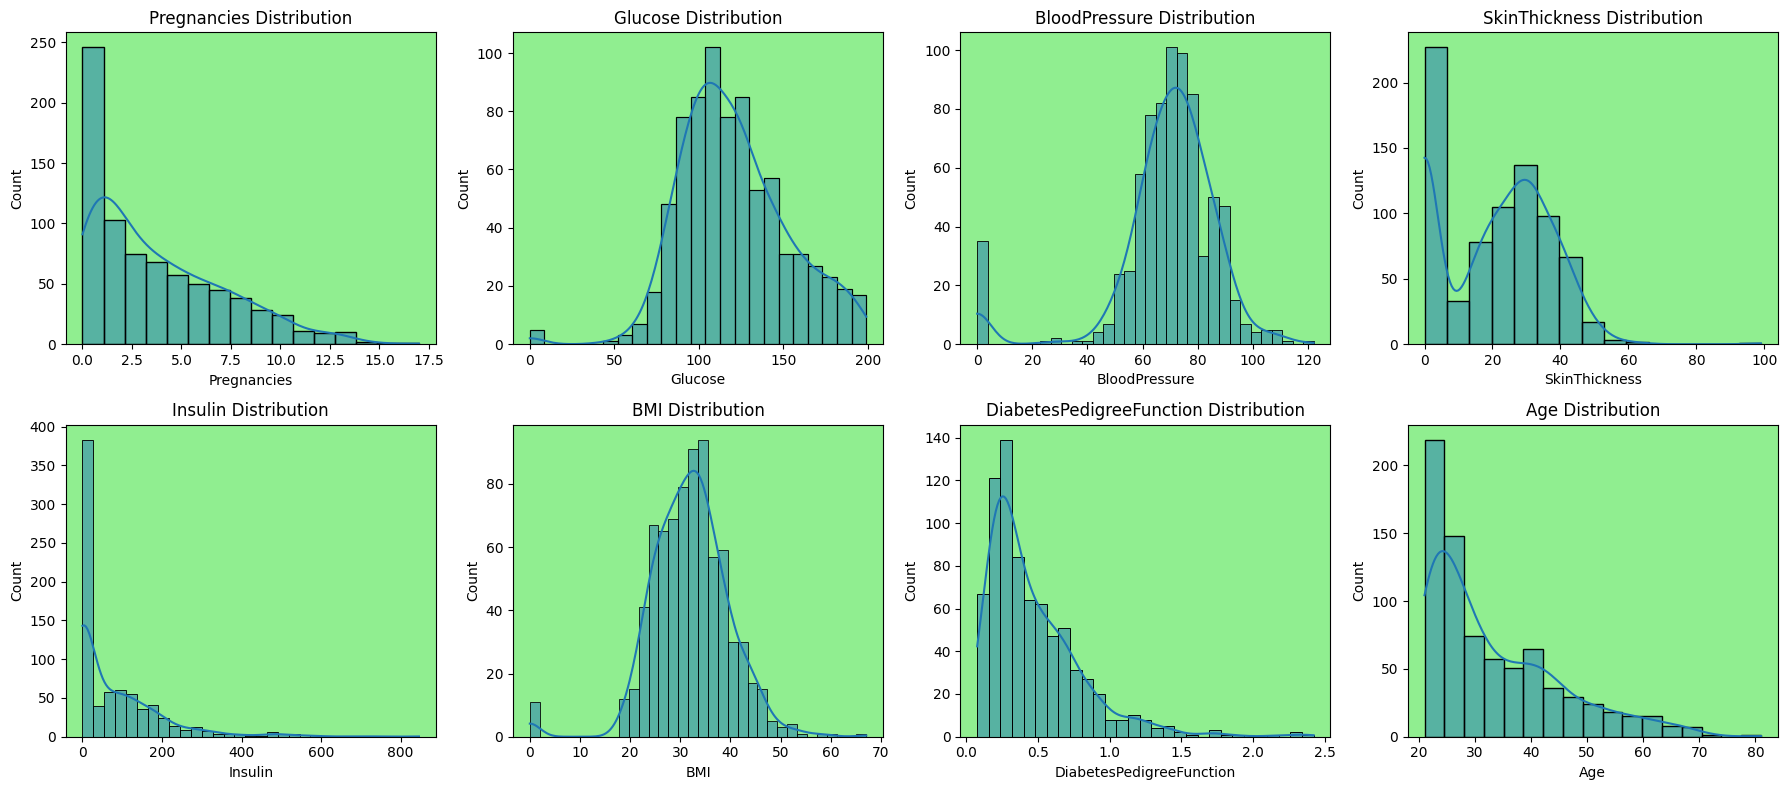

In [16]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
fig,axes = plt.subplots(2,4,figsize=(18,8))
for i,col in enumerate (cols):
    row, col_index = divmod(i, 4)
    sns.histplot(df[col],kde=True,ax=axes[row,col_index])
    axes[row,col_index].set_title(f'{col} Distribution')
    axes[row,col_index].set_facecolor('lightgreen')


plt.tight_layout()
plt.show()

In [17]:
df_new = pd.DataFrame()

In [18]:
def z_score(df,column):
    df[column] = pd.to_numeric(df[column], errors='coerce')
    mean = np.mean(df[column])
    std = np.std(df[column])
    upper_bound = mean + 3 * std  # upper limit
    lower_bound = mean - 3 * std  # lower limit
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].tolist()
    print(f"Outliers: {outliers}")
    return  upper_bound ,lower_bound

In [19]:
upper_bound ,lower_bound  = z_score(df,'SkinThickness')
print("Upper_bound ",upper_bound)
print("Lower_bound ",lower_bound)

Outliers: [99]
Upper_bound  68.36194421282414
Lower_bound  -27.28902754615748


In [20]:
df_new['SkinThickness'] = np.where(df['SkinThickness'] > upper_bound,
                        upper_bound,
                        np.where(
                        df['SkinThickness'] < lower_bound,
                        lower_bound,df['SkinThickness']))

Text(0.5, 1.0, 'After Capping')

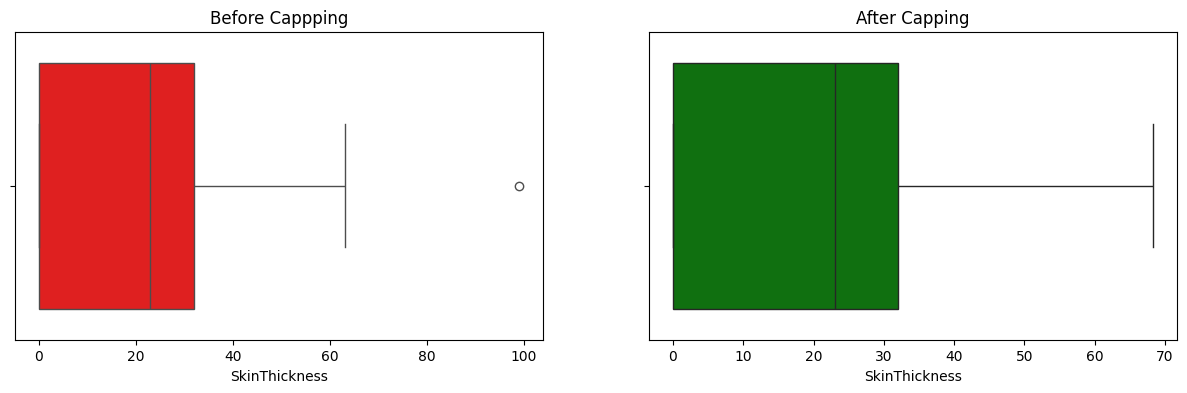

In [21]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.boxplot(df['SkinThickness'], orient='h',color='red')
plt.title('Before Cappping')

plt.subplot(1, 2, 2)
sns.boxplot(df_new['SkinThickness'], orient='h',color='green')
plt.title('After Capping')

In [22]:
df_trim = pd.DataFrame()

In [23]:
df_trim = df[(df['SkinThickness'] < upper_bound) & (df['SkinThickness'] > lower_bound)]

Text(0.5, 1.0, 'After Trimming')

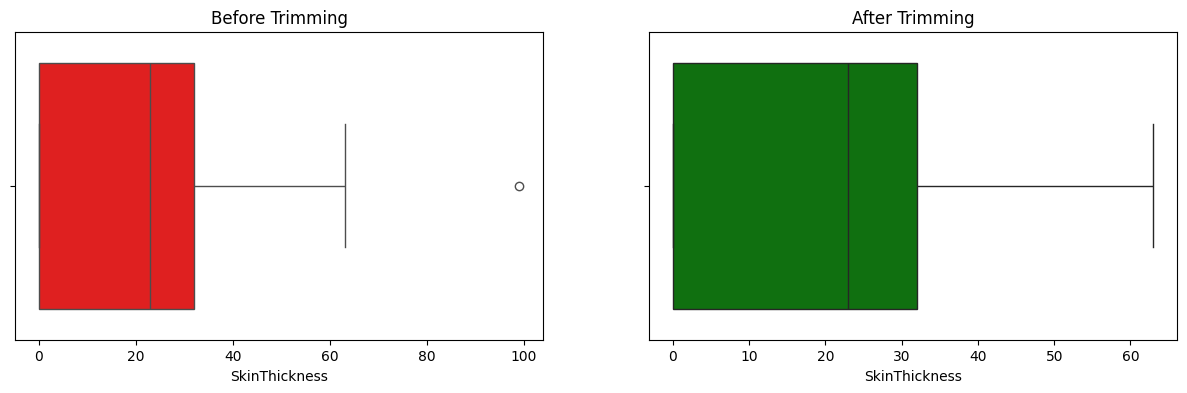

In [24]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.boxplot(df['SkinThickness'], orient='h',color='red')
plt.title('Before Trimming')

plt.subplot(1, 2, 2)
sns.boxplot(df_trim['SkinThickness'], orient='h',color='green')
plt.title('After Trimming')

In [25]:
outliers = []
def IQR_filtering(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    for i in df[column]:
        if (i < lower_bound or i > upper_bound):
            outliers.append(i)

    print("Outliers: ",outliers)
    return upper_bound , lower_bound

In [26]:
upper_bound, lower_bound = IQR_filtering(df,'Pregnancies')

Outliers:  [15, 17, 14, 14]


In [27]:
corr_matrix=df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [28]:
target_corr = corr_matrix['Outcome'].sort_values(ascending=False)
print("Correlation with target:\n", target_corr)

Correlation with target:
 Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [29]:
cols_to_drop=['SkinThickness','BloodPressure']
df.drop(cols_to_drop,axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


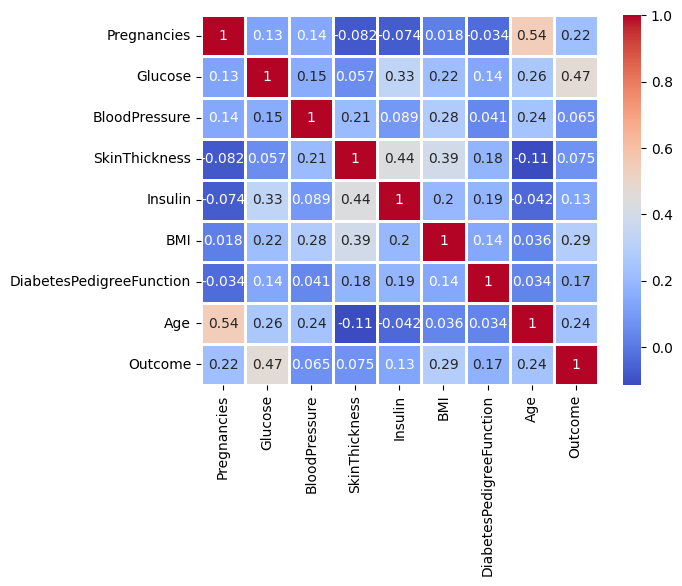

In [31]:
sns.heatmap(corr_matrix,annot=True,linewidths=2,cmap='coolwarm')
plt.show()

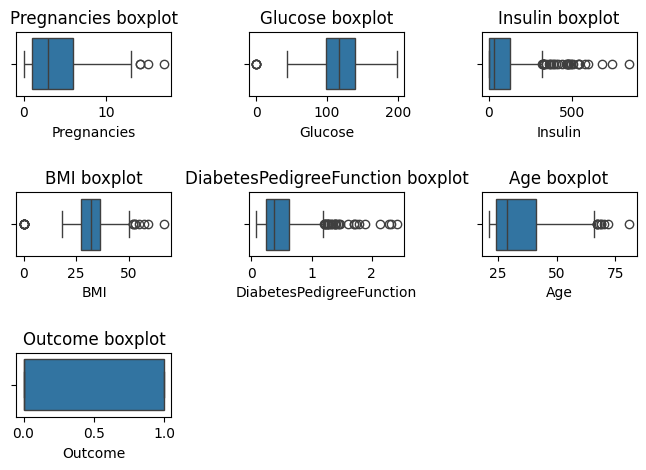

In [33]:
plt.figure(figsize=(8, 5))
for i, col in enumerate(df):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=1.5, wspace=0.5)
plt.show()

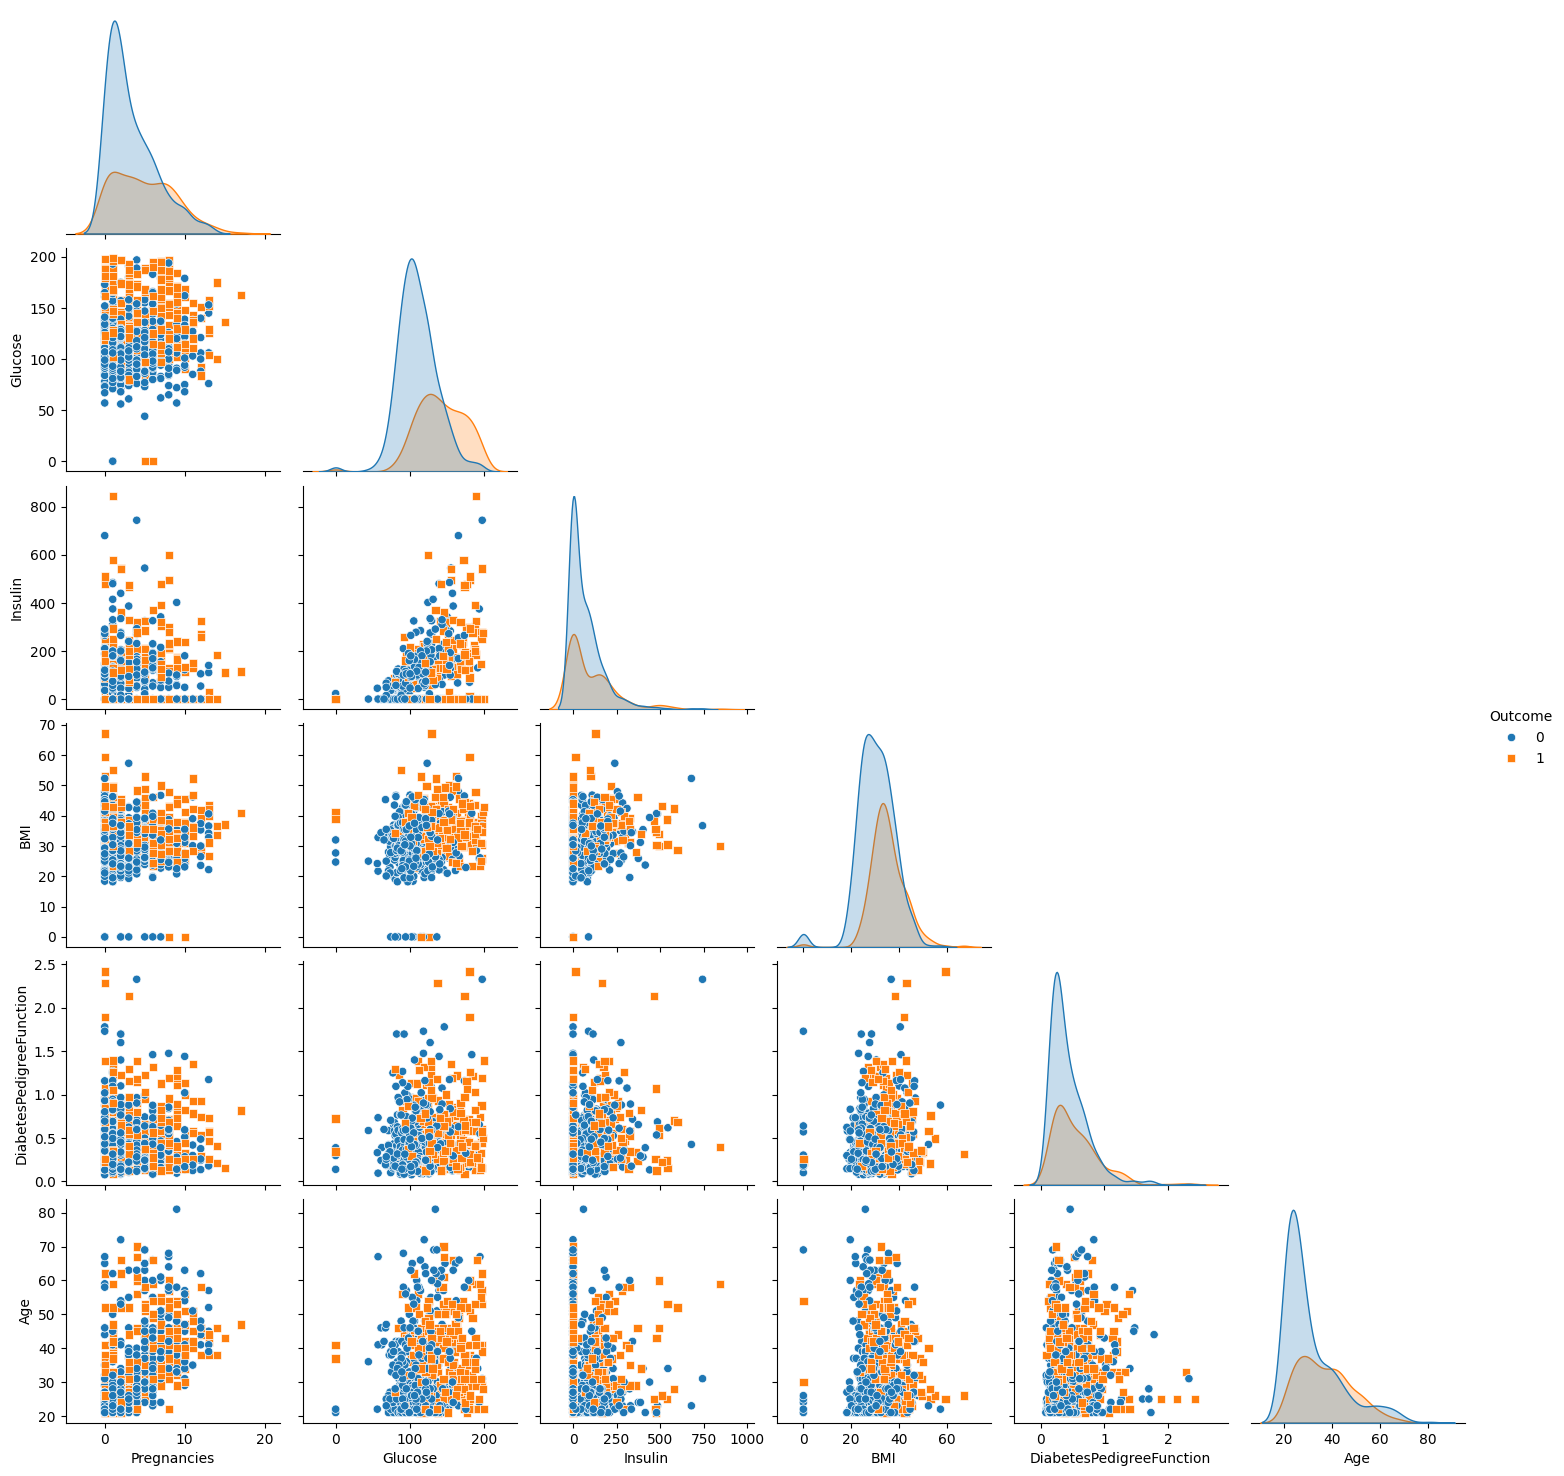

In [34]:
sns.pairplot(df, hue="Outcome", markers=["o", "s"], corner=True);

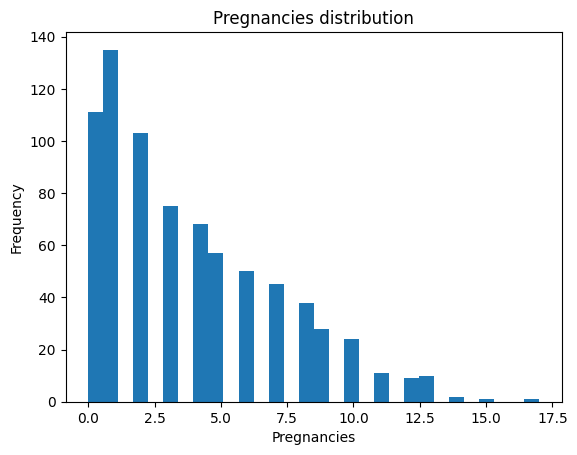

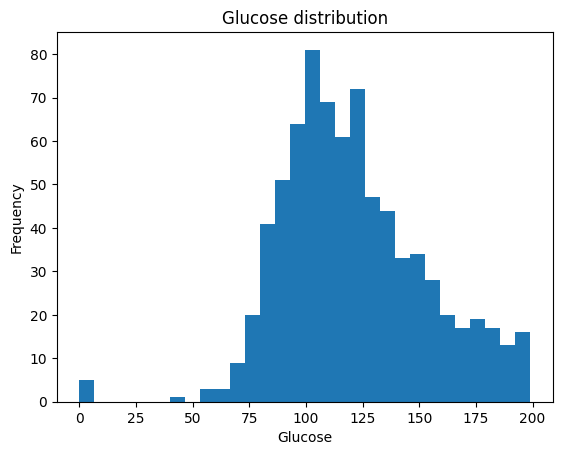

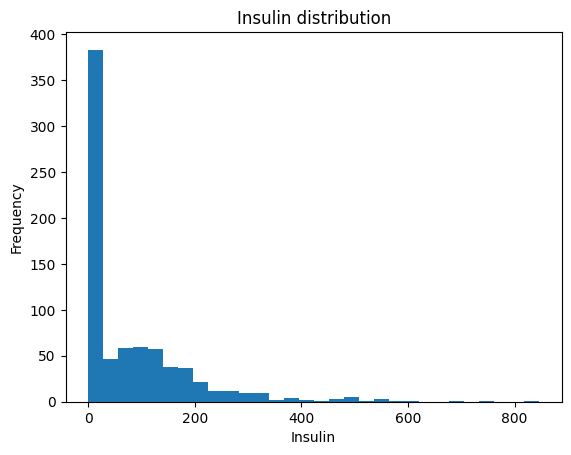

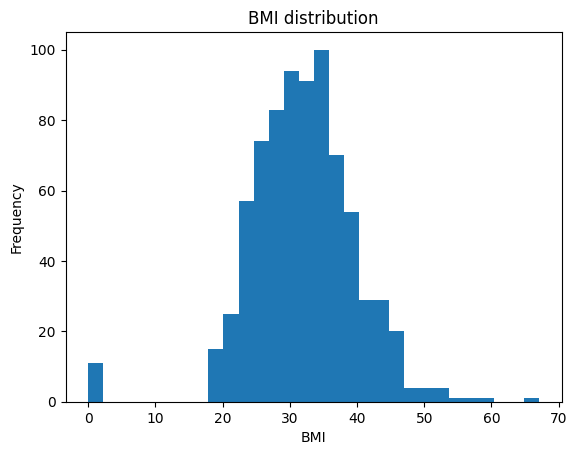

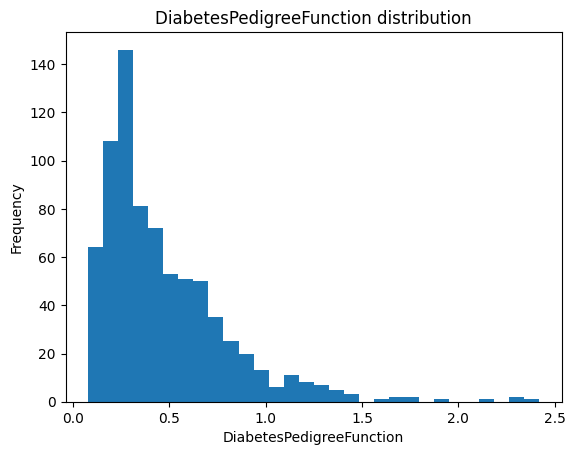

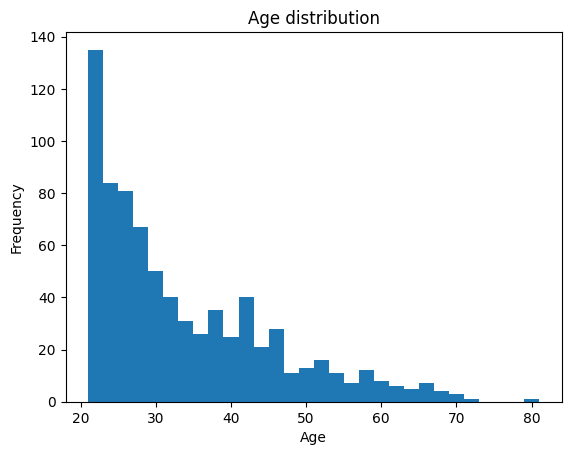

In [35]:
cols = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in cols:
    plt.hist(df[col], bins=30)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [36]:
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
NewBMI

,0
0,Underweight
1,Normal
2,Overweight
3,Obesity 1
4,Obesity 2
5,Obesity 3


In [37]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [38]:
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [39]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))
df

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148,0,33.6,0.627,50,1,Obesity 2,Abnormal
1,1,85,0,26.6,0.351,31,0,Obesity 2,Abnormal
2,8,183,0,23.3,0.672,32,1,Obesity 2,Abnormal
3,1,89,94,28.1,0.167,21,0,Obesity 2,Normal
4,0,137,168,43.1,2.288,33,1,Obesity 3,Abnormal
...,...,...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0,Obesity 2,Abnormal
764,2,122,0,36.8,0.340,27,0,Obesity 2,Abnormal
765,5,121,112,26.2,0.245,30,0,Obesity 2,Normal
766,1,126,0,30.1,0.349,47,1,Obesity 2,Abnormal


In [40]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [41]:
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [42]:
cat_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [43]:
df=df.drop(columns=cat_df,axis=1)

In [44]:
cat_df=cat_df.astype(int)

In [45]:
df=pd.concat([df,cat_df],axis=1)
df

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148,0,33.6,0.627,50,1,0,1,0,0,0,0,0,0,0,1
1,1,85,0,26.6,0.351,31,0,0,1,0,0,0,0,0,1,0,0
2,8,183,0,23.3,0.672,32,1,0,1,0,0,0,0,0,0,0,1
3,1,89,94,28.1,0.167,21,0,0,1,0,0,0,1,0,1,0,0
4,0,137,168,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0,0,1,0,0,0,0,0,0,1,0
764,2,122,0,36.8,0.340,27,0,0,1,0,0,0,0,0,0,1,0
765,5,121,112,26.2,0.245,30,0,0,1,0,0,0,1,0,0,1,0
766,1,126,0,30.1,0.349,47,1,0,1,0,0,0,0,0,0,1,0


In [46]:
y=df[['Outcome']]
x=df.drop('Outcome',axis=1)

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=57)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 16)
(154, 16)
(614, 1)
(154, 1)


In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

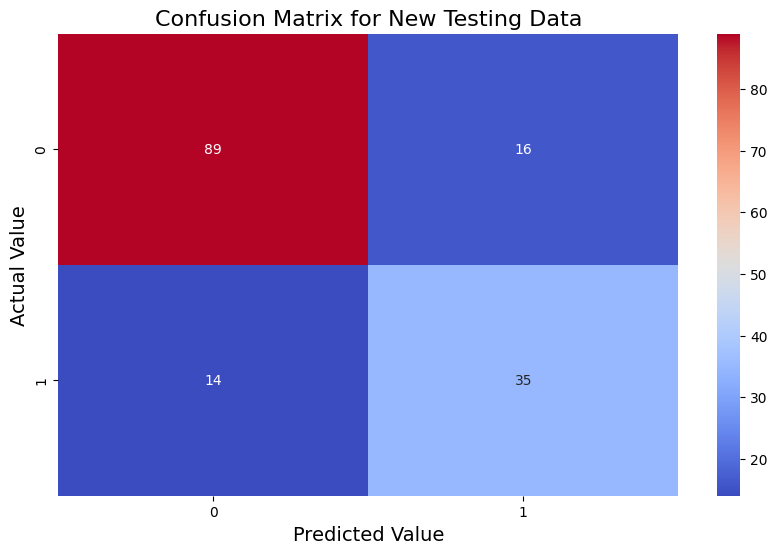

In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)
plt.show()

In [53]:
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.69      0.71      0.70        49

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



In [54]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
y_probs = model.predict_proba(x_test)[:, 1]

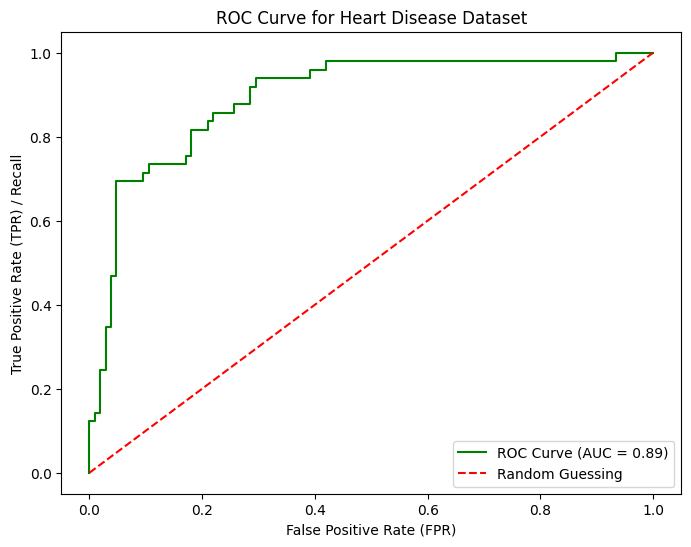

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', color='red')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('ROC Curve for Heart Disease Dataset')
plt.legend()
plt.show()

In [56]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_lr=accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.69      0.71      0.70        49

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



In [65]:
y_pred = LR.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.81


In [67]:
import joblib
joblib.dump(model, '/content/diabetes_model.pkl')
joblib.dump(LR, '/content/scaler.pkl')

['/content/scaler.pkl']